In [1]:
import numpy as np
import astropy.units as u 
import scipy.stats as st

%matplotlib inline
import matplotlib.pyplot as plt

Important to note that we will need to know that the inductances and capacitances that we are trying to measure are in the range of mH and microF to nF, respectively.

### Determine the output resistance and open circuit voltage for source enclosed in numbered aluminum box.

In [2]:
# Preliminary Example.
load_resistance = np.asarray([3e2,1e3,1.4e3,2e3,2.4e3,3e3,1e7])*u.ohm
voltage_measured = np.asarray([2.55,5.22,5.99,6.74,7.09,7.46,9.5])*u.volt
error = 0.03*voltage_measured

In [3]:
load_resistance

<Quantity [3.0e+02, 1.0e+03, 1.4e+03, 2.0e+03, 2.4e+03, 3.0e+03, 1.0e+07] Ohm>

In [4]:
voltage_measured

<Quantity [2.55, 5.22, 5.99, 6.74, 7.09, 7.46, 9.5 ] V>

In [5]:
current = voltage_measured/load_resistance
current.decompose()

<Quantity [8.50000000e-03, 5.22000000e-03, 4.27857143e-03, 3.37000000e-03,
           2.95416667e-03, 2.48666667e-03, 9.50000000e-07] A>

In [6]:
slope, intercept, r_value, p_value, std_err = st.linregress(current,voltage_measured)

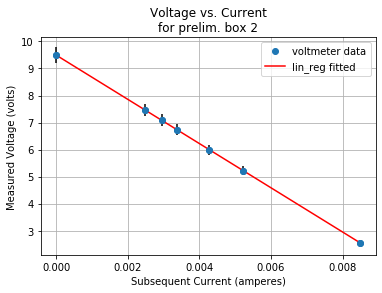

In [7]:
plt.plot(current,voltage_measured,'o',label='voltmeter data')

i = u.ampere
v = u.volt
plt.errorbar(current/i,voltage_measured/v, xerr=0, yerr=error/v,fmt='o',ecolor='k')
plt.plot(current/i,((current/i)*slope+intercept),'r',label='lin_reg fitted')
plt.xlabel('Subsequent Current (amperes)')
plt.ylabel('Measured Voltage (volts)')
plt.title('Voltage vs. Current\nfor prelim. box 2')
plt.grid()
plt.legend()

In [8]:
print(intercept*u.volt)
print(slope*u.ohm)

short_circuit_current = -intercept/slope
output_resistance = (intercept/short_circuit_current)*(u.volt/u.amp)
output_resistance.to(u.ohm)
# Everything checks out here, and the logic is solid!

9.49760890746988 V
-818.0892251173963 Ohm


<Quantity 818.08922512 Ohm>

$$V_{0} \approx 9.5 V \text{, for our open-circuit voltage}$$

**At the short-circuit state of the setup:**
$$\frac{V_{0}}{R_{0}} = I\text{ (short-circuit current)}$$ 

Thus:
$$ R_{0} = \frac{V_{0}}{\text{x-intercept}} \text{, where the x-intercept happens to equal the short-circuit current, I.}$$
$$\text{Yielding: }R_{0} \approx 820 \Omega $$

# Mystery Boxes!

#### Exercise 2: If Voltage applied to circuit consisting of a resistor, R, and capacitor, C, IN SERIES.

### Mystery Box A or B, we chose A.

In [9]:
"""boxAdata2.png"""

load_resistance = np.asarray([1.003e5,1.003e5,1.003e5,1.003e5,2e4,2e4,2e4,2e4,4.99e3,4.99e3,
                              9.98e2,9.98e2,9.98e2,9.98e2,9.98e2,3.99e2,3.99e2,1e2,1e2,1e2]) *u.ohm

CH1_voltage    = np.asarray([12.4,3.5,4.8,3.8,7.5,5.2,4,3.6,11.6,4.3,11.6,8.4,6.8,6,3.6,5.6,
                              3.6,8.8,6.6,6])                                                *u.volt

CH1_frequency   = np.asarray([5.12e1,9.8e1,1.5e2,2.02e2,4.02e2,6.06e2,8.1e2,9.1e2,9.86e2,
                              2.98e3,5.025e3,7.042e3,9.05e3,1.042e4,2.02e4,2.93e4,5.07e4,
                             7.09e4,9e4,9.9e4])                                              *u.hertz

CH2_voltage     = np.asarray([32,34,34,34,33,33,33,34,32.4,33.2,32.4,33.2,33.2,33.2,34.4,
                              34.2,34,33,30.8,30])                                           *u.volt

CH2_frequency   = np.asarray([5.12e1,9.82e1,1.507e2,1.99e2,4.02e2,6.05e2,8.06e2,9.12e2,
                              9.86e2,2.98e3,5.025e3,7.042e3,9.02e3,1.042e4,2.01e4,2.95e4,
                              5.05e4,8.08e4,9e4,9.85e4])                                     *u.hertz

phase_angle     = np.asarray([90,90,91,97,91,92,92,90,92,90,91,92,90,92,95,93,95,91,93,92])  *u.degree

# Hunch that phase_angle staying consistently at 90deg means resistor?

$$I = I_{0}cos(\omega t) $$
$$
\text{Monitor voltage, while varying the input frequency.}$$

$$\text{We are told that the DC resistance of Box A is OL (overload, high DC impedance)}$$

$$I = \frac{V_{2}}{R} \text{ and } V_{1} = I|Z|$$ 
$$V_{1} = \frac{V_{2}}{R}|Z|$$
$$\text{Thus, } |Z| = R\frac{V_{1}}{V_{2}}$$

In [10]:
# We suspect at least one capacitor component given the DC impedance.
impedance = (CH1_voltage/CH2_voltage)*load_resistance
error = (0.03*(CH1_voltage/CH2_voltage)*load_resistance)
error = (1/error)**2

In [11]:
total = len(CH1_frequency)
average_frequency = np.zeros(total) *u.hertz
for index in range(total):
    average_frequency[index] = np.asarray((CH1_frequency[index]+CH2_frequency[index])/2) *u.hertz
average_frequency[:5]

<Quantity [ 51.2 ,  98.1 , 150.35, 200.5 , 402.  ] Hz>

In [12]:
angular_frequency = (2*np.pi*average_frequency)
angular_frequency

<Quantity [3.21699088e+02, 6.16380479e+02, 9.44676911e+02, 1.25977865e+03,
           2.52584049e+03, 3.80446870e+03, 5.07681373e+03, 5.72398181e+03,
           6.19522071e+03, 1.87238922e+04, 3.15730062e+04, 4.42461909e+04,
           5.67685793e+04, 6.54707909e+04, 1.26606184e+05, 1.84725648e+05,
           3.17929177e+05, 4.76579606e+05, 5.65486678e+05, 6.20464549e+05] Hz>

5.695668257512805e-14

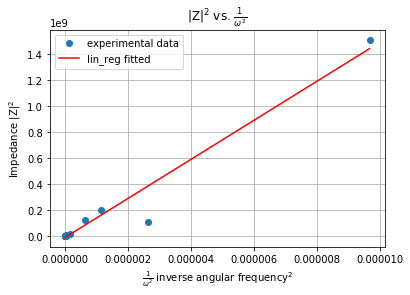

In [13]:
"""Z**2 VERSUS w**-2"""
slope, intercept, r_value, p_value, std_err = st.linregress((1/angular_frequency**2),impedance**2)
plt.plot((1/angular_frequency**2),impedance**2,'o',label='experimental data')

o = u.ohm
f = u.second**-1
plt.plot((1/angular_frequency**2)*f**2,((1/angular_frequency**2)*f**2*slope+intercept),'r',label='lin_reg fitted')
plt.xlabel('$\\frac{1}{\\omega^2}$ inverse angular frequency$^2$')
plt.ylabel('Impedance |Z|$^2$')
plt.title('|Z|$^2$ vs. $\\frac{1}{\\omega^2}$')
plt.loglog()
plt.grid()
plt.legend()

p_value

0.5359090736066541

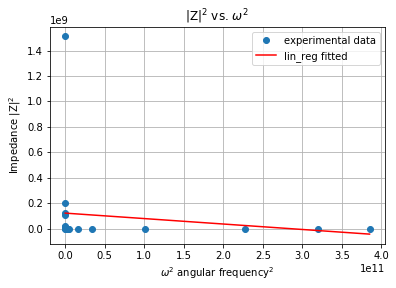

In [14]:
"""Z**2 VERSUS w**2"""
slope, intercept, r_value, p_value, std_err = st.linregress(angular_frequency**2,impedance**2)
plt.plot(angular_frequency**2,impedance**2,'o',label='experimental data')

plt.plot(angular_frequency**2/f**2,((angular_frequency**2/f**2)*slope+intercept),'r',label='lin_reg fitted')
plt.xlabel('$\\omega^2$ angular frequency$^2$')
plt.ylabel('Impedance |Z|$^2$')
plt.title('|Z|$^2$ vs. $\\omega^2$')
plt.grid()
plt.legend()

p_value

0.16673942965328226

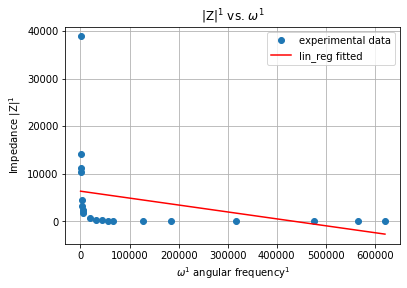

In [15]:
"""Z VERSUS w"""
slope, intercept, r_value, p_value, std_err = st.linregress(angular_frequency**1,impedance**1)
plt.plot(angular_frequency**1,impedance**1,'o',label='experimental data')

plt.plot(angular_frequency**1/f**1,((angular_frequency**1/f**1)*slope+intercept),'r',label='lin_reg fitted')
plt.xlabel('$\\omega^1$ angular frequency$^1$')
plt.ylabel('Impedance |Z|$^1$')
plt.title('|Z|$^1$ vs. $\\omega^1$')
plt.grid()
plt.legend()

p_value

0.4988275006043189

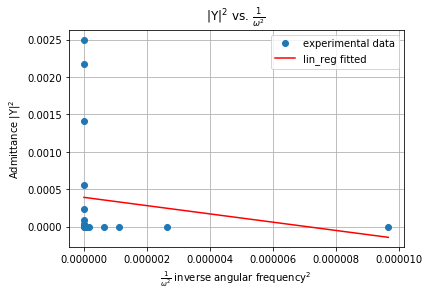

In [16]:
"""Y**2 VERSUS w**-2"""
admittance = 1/impedance

slope, intercept, r_value, p_value, std_err = st.linregress((1/angular_frequency**2),admittance**2)
plt.plot((1/angular_frequency**2),admittance**2,'o',label='experimental data')

plt.plot((1/angular_frequency**2)*f**2,((1/angular_frequency**2)*f**2*slope+intercept),'r',label='lin_reg fitted')
plt.xlabel('$\\frac{1}{\\omega^2}$ inverse angular frequency$^2$')
plt.ylabel('Admittance |Y|$^2$')
plt.title('|Y|$^2$ vs. $\\frac{1}{\\omega^2}$')
plt.grid()
plt.legend()

p_value

In [17]:
admittance**2*o**2
angular_frequency**2/u.hertz**2
error

<Quantity [7.35550019e-07, 1.04226312e-05, 5.54154653e-06, 8.84191357e-06,
           5.37777778e-05, 1.11871302e-04, 1.89062500e-04, 2.47770919e-04,
           3.48121175e-04, 2.66008587e-03, 8.70302939e-03, 1.74266538e-02,
           2.65922295e-02, 3.41562414e-02, 1.01861084e-01, 2.60308205e-01,
           6.22536087e-01, 1.56250000e+00, 2.41975309e+00, 2.77777778e+00] 1 / Ohm2>

[7.35550019e-07 1.04226312e-05 5.54154653e-06 8.84191357e-06
 5.37777778e-05 1.11871302e-04 1.89062500e-04 2.47770919e-04
 3.48121175e-04 2.66008587e-03 8.70302939e-03 1.74266538e-02
 2.65922295e-02 3.41562414e-02 1.01861084e-01 2.60308205e-01
 6.22536087e-01 1.56250000e+00 2.41975309e+00 2.77777778e+00] 1 / Ohm2


2.320002216753377e-25

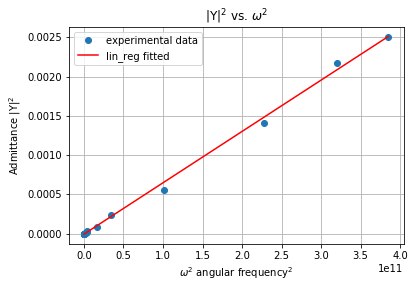

In [18]:
"""Y**2 VERSUS w**2"""
admittance = 1/impedance

slope, intercept, r_value, p_value, std_err = st.linregress(angular_frequency**2,admittance**2)
plt.plot(angular_frequency**2,admittance**2,'o',label='experimental data')

print(error)

# plt.errorbar(angular_frequency**2/f**2,admittance**2*o**2,xerr=0,yerr=error*o**2,fmt='o',ecolor='k')
plt.plot(angular_frequency**2/u.hertz**2,(angular_frequency**2/f**2*slope+intercept),'r',label='lin_reg fitted')

plt.xlabel('$\\omega^2$ angular frequency$^2$')
plt.ylabel('Admittance |Y|$^2$')
plt.title('|Y|$^2$ vs. $\\omega^2$')
plt.grid()
plt.legend()

p_value

#### Here's the best fit!
This plot of the admittance squared verus the angular frequency squared has the best linear fit.
$$|Y|^2  \alpha \omega^2$$

### Mystery Box C or D, we chose D.

In [44]:
"""boxDdata.png"""
load_resistance = np.asarray([3e4,3e4,3e4,1e4,1e4,5e3,5e3,3e3,3e3,1e3,1e3,1e3,4e2,3e2,3e2,1e2,1e2,1e2,4e1,4e1])         *u.ohm

frequency       = np.asarray([5.15e1,7.27e1,9.22e1,1.922e2,2.503e2,4.095e2,5.321e2,6.542e2,8.623e2,9.6e2,1.1768e3,2.0851e3,
                       3.0718e3,7.6108e3,9.6099e3,2.75701e4,5.14583e4,7.58441e4,9.03068e4,1.00265e5])                   *u.hertz

voltage_1       = np.asarray([10.,9.4,8.4,9.6,8.8,9.4,8.6,9.4,8.6,10.6,10.4,9.4,10.4,8.8,8.,
                              7.68,6.48,6.08,8.16,8.16])                                                                *u.volt

voltage_2       = np.asarray([54.4,68.8,78.4,64.,76.,68.,78.,66.,76.,37.6,44.8,65.6,
                              44.8,68.,74.,52.8,56.,56.,32.8,32.8])                                                     *u.volt

phase_angle     = np.asarray([96.5,98.4,99.3,96.7,94.5,93.8,94.2,91.4,95.6,91.4,99.7,
                              99.2,100,107,111,135,152,160,158,160])                                                    *u.degree

$$\text{We are told that the DC resistance of Box D is OL (overload, high DC impedance)}$$

In [45]:
# We suspect at least one capacitor component given the DC impedance.
impedance = (voltage_1/voltage_2)*load_resistance
impedance

<Quantity [5514.70588235, 4098.8372093 , 3214.28571429, 1500.        ,
           1157.89473684,  691.17647059,  551.28205128,  427.27272727,
            339.47368421,  281.91489362,  232.14285714,  143.29268293,
             92.85714286,   38.82352941,   32.43243243,   14.54545455,
             11.57142857,   10.85714286,    9.95121951,    9.95121951] Ohm>

In [46]:
angular_frequency = (2*np.pi*frequency)
angular_frequency

<Quantity [3.23584043e+02, 4.56787572e+02, 5.79309685e+02, 1.20762822e+03,
           1.57268128e+03, 2.57296438e+03, 3.34328290e+03, 4.11045983e+03,
           5.41799069e+03, 6.03185789e+03, 7.39405247e+03, 1.31010697e+04,
           1.93006886e+04, 4.78200667e+04, 6.03807825e+04, 1.73228047e+05,
           3.23322034e+05, 4.76542535e+05, 5.67414359e+05, 6.29983575e+05] Hz>

In [47]:
admittance = 1/impedance

0.40745588042650305

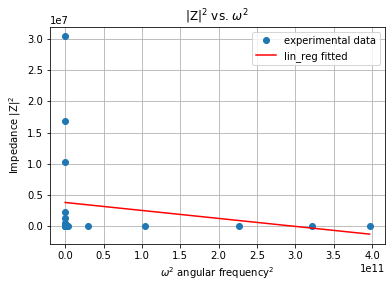

In [48]:
"""Z**2 VERSUS w**2"""
slope, intercept, r_value, p_value, std_err = st.linregress(angular_frequency**2,impedance**2)
plt.plot(angular_frequency**2,impedance**2,'o',label='experimental data')

plt.plot(angular_frequency**2/f**2,((angular_frequency**2/f**2)*slope+intercept),'r',label='lin_reg fitted')
plt.xlabel('$\\omega^2$ angular frequency$^2$')
plt.ylabel('Impedance |Z|$^2$')
plt.title('|Z|$^2$ vs. $\\omega^2$')
plt.grid()
plt.legend()

p_value

0.13524473125347872

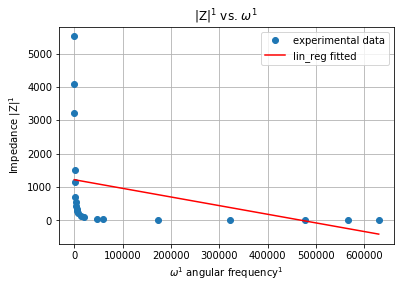

In [49]:
"""Z VERSUS w"""
slope, intercept, r_value, p_value, std_err = st.linregress(angular_frequency**1,impedance**1)
plt.plot(angular_frequency**1,impedance**1,'o',label='experimental data')

plt.plot(angular_frequency**1/f**1,((angular_frequency**1/f**1)*slope+intercept),'r',label='lin_reg fitted')
plt.xlabel('$\\omega^1$ angular frequency$^1$')
plt.ylabel('Impedance |Z|$^1$')
plt.title('|Z|$^1$ vs. $\\omega^1$')
plt.grid()
plt.legend()

p_value

0.3085087278291191

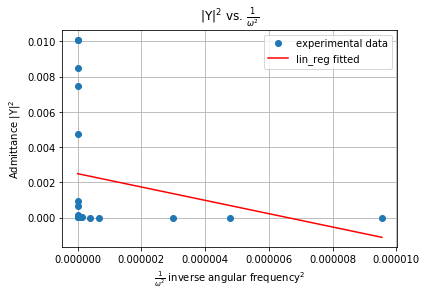

In [50]:
"""Y**2 VERSUS w**-2"""
admittance = 1/impedance

slope, intercept, r_value, p_value, std_err = st.linregress((1/angular_frequency**2),admittance**2)
plt.plot((1/angular_frequency**2),admittance**2,'o',label='experimental data')

plt.plot((1/angular_frequency**2)*f**2,((1/angular_frequency**2)*f**2*slope+intercept),'r',label='lin_reg fitted')
plt.xlabel('$\\frac{1}{\\omega^2}$ inverse angular frequency$^2$')
plt.ylabel('Admittance |Y|$^2$')
plt.title('|Y|$^2$ vs. $\\frac{1}{\\omega^2}$')
plt.grid()
plt.legend()

p_value

2.8470343910232627e-09

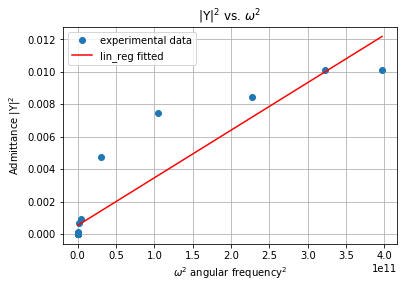

In [53]:
"""Y**2 VERSUS w**2"""
admittance = 1/impedance

slope, intercept, r_value, p_value, std_err = st.linregress(angular_frequency**2,admittance**2)
plt.plot(angular_frequency**2,admittance**2,'o',label='experimental data')

plt.plot(angular_frequency**2/f**2,(angular_frequency**2/f**2*slope+intercept),'r',label='lin_reg fitted')
plt.xlabel('$\\omega^2$ angular frequency$^2$')
plt.ylabel('Admittance |Y|$^2$')
plt.title('|Y|$^2$ vs. $\\omega^2$')
# plt.loglog()
plt.grid()
plt.legend()

p_value

8.615784742560162e-26

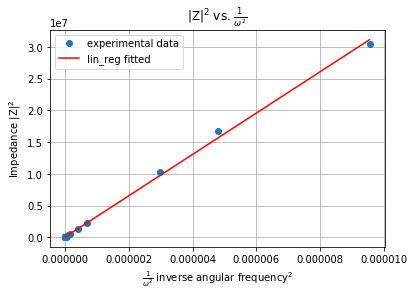

In [27]:
"""Z**2 VERSUS w**-2"""
slope, intercept, r_value, p_value, std_err = st.linregress((1/angular_frequency**2),impedance**2)
plt.plot((1/angular_frequency**2),impedance**2,'o',label='experimental data')

plt.plot((1/angular_frequency**2)*f**2,((1/angular_frequency**2)*f**2*slope+intercept),'r',label='lin_reg fitted')
plt.xlabel('$\\frac{1}{\\omega^2}$ inverse angular frequency$^2$')
plt.ylabel('Impedance |Z|$^2$')
plt.title('|Z|$^2$ vs. $\\frac{1}{\\omega^2}$')
plt.grid()
plt.legend()

p_value

#### Here's the best fit!
This plot of the impedance squared verus the inverse angular frequency squared has the best linear fit.
$$|Z|^2 \alpha \frac{1}{\omega^2}$$


### Mystery Box E, a must complete.

In [28]:
"""boxEdata.png"""
load_resistance = np.asarray([2e5,2e5,2e5,2e5,2e5,2e5,2e5,2e5,2e5,2e5,2e4,2e4,2e4,2e4,2e4,2e4,2e4,2e4,2e4,2e4,
                              1e4,1e4,9.98e2,9.98e2,9.98e2,9.98e2,9.98e2,9.98e2,9.98e2,9.98e2,9.98e2,9.98e2])   *u.ohm

CH1_voltage     = np.asarray([36,36,33.2,20.8,25,21.6,20.4,9.2,6,4.4,18,17.6,13.6,11.2,9.6,7.6,6.4,6.8,6.4,
                              5.6,7.2,4.8,13.2,7.8,20,27.2,33,34.4,37.6,38.8,38.85,40])                         *u.volt

CH1_frequency   = np.asarray([5.1e1,9.6e1,2.94e2,5.09e2,7.09e2,9.08e2,1.01e3,2.96e3,5.08e3,7.1e3,9.01e3,
                             9.5e3,1.266e4,1.53e4,1.71e4,1.99e4,2.222e4,2.421e4,2.65e4,2.85e4,3.195e4,3.509e4,
                             3.69e4,4.2e4,4.2e4,4.55e4,4.85e4,4.94e4,5.3e4,5.59e4,5.83e4,6.03e4])               *u.hertz

CH2_voltage     = np.asarray([8,10.8,20.8,28.4,32.4,35.2,36.4,39.6,39.6,39.2,36.8,37.2,38.4,39,39.2,39.6,40,
                             40.8,40.8,41.4,44,43,42,42,39,35,31,29,24,22,19,18])                               *u.volt

CH2_frequency   = np.asarray([5.1e1,9.5e1,2.97e2,5.1e2,7.08e2,9.06e2,1.012e3,2.95e3,5.063e3,7.042e3,9.015e3,
                             9.5e3,1.27e4,1.54e4,1.71e4,2e4,2.241e4,2.45e4,2.67e4,2.916e4,3.226e4,3.52e4,
                             3.72e4,4.003e4,4.3e4,4.545e4,4.9e4,4.97e4,5.2e4,5.57e4,5.8e4,6.01e4])              *u.hertz

phase_angle     = np.asarray([145,130,110,108,103,101,105,107,120,138,100,102,104,102,103,106,106,110,110,111,
                              107,125,110,120,102,98,95,100,98,98,94,97])                                       *u.degree

$$\text{We are told that the DC resistance of Box E is OL (overload, high DC impedance)}$$

In [29]:
# We suspect at least one capacitor component given the DC impedance.
impedance = (CH1_voltage/CH2_voltage)*load_resistance

In [30]:
total = len(CH1_frequency)
average_frequency = np.zeros(total) *u.hertz
for index in range(total):
    average_frequency[index] = np.asarray((CH1_frequency[index]+CH2_frequency[index])/2) *u.hertz

In [31]:
angular_frequency = (2*np.pi*average_frequency)

In [32]:
admittance = 1/impedance

0.1819261586247042

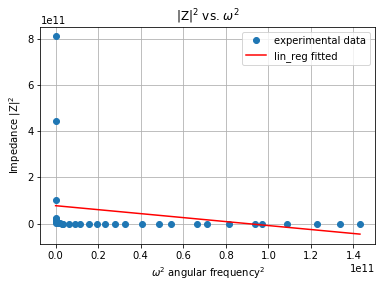

In [33]:
"""Z**2 VERSUS w**2"""
slope, intercept, r_value, p_value, std_err = st.linregress(angular_frequency**2,impedance**2)
plt.plot(angular_frequency**2,impedance**2,'o',label='experimental data')

plt.plot(angular_frequency**2/f**2,((angular_frequency**2/f**2)*slope+intercept),'r',label='lin_reg fitted')
plt.xlabel('$\\omega^2$ angular frequency$^2$')
plt.ylabel('Impedance |Z|$^2$')
plt.title('|Z|$^2$ vs. $\\omega^2$')
plt.grid()
plt.legend()

p_value

0.006155776367827103

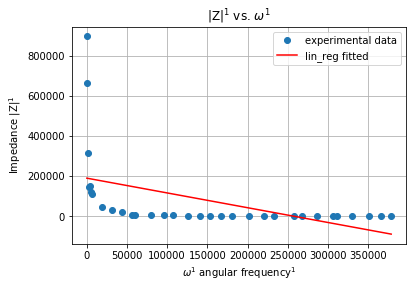

In [34]:
"""Z VERSUS w"""
slope, intercept, r_value, p_value, std_err = st.linregress(angular_frequency**1,impedance**1)
plt.plot(angular_frequency**1,impedance**1,'o',label='experimental data')

plt.plot(angular_frequency**1/f**1,((angular_frequency**1/f**1)*slope+intercept),'r',label='lin_reg fitted')
plt.xlabel('$\\omega^1$ angular frequency$^1$')
plt.ylabel('Impedance |Z|$^1$')
plt.title('|Z|$^1$ vs. $\\omega^1$')
plt.grid()
plt.legend()

p_value

0.711676456370765

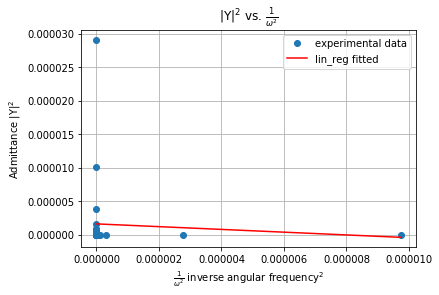

In [35]:
"""Y**2 VERSUS w**-2"""
admittance = 1/impedance

slope, intercept, r_value, p_value, std_err = st.linregress((1/angular_frequency**2),admittance**2)
plt.plot((1/angular_frequency**2),admittance**2,'o',label='experimental data')

plt.plot((1/angular_frequency**2)*f**2,((1/angular_frequency**2)*f**2*slope+intercept),'r',label='lin_reg fitted')
plt.xlabel('$\\frac{1}{\\omega^2}$ inverse angular frequency$^2$')
plt.ylabel('Admittance |Y|$^2$')
plt.title('|Y|$^2$ vs. $\\frac{1}{\\omega^2}$')
plt.grid()
plt.legend()

p_value

0.31611983331351884

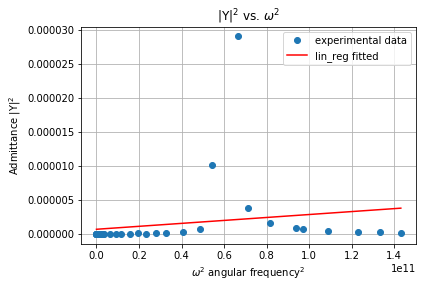

In [38]:
"""Y**2 VERSUS w**2"""
admittance = 1/impedance

slope, intercept, r_value, p_value, std_err = st.linregress(angular_frequency**2,admittance**2)
plt.plot(angular_frequency**2,admittance**2,'o',label='experimental data')

plt.plot(angular_frequency**2/f**2,(angular_frequency**2/f**2*slope+intercept),'r',label='lin_reg fitted')
plt.xlabel('$\\omega^2$ angular frequency$^2$')
plt.ylabel('Admittance |Y|$^2$')
plt.title('|Y|$^2$ vs. $\\omega^2$')
# plt.loglog()
plt.grid()
plt.legend()

p_value

3.9396754723321443e-20

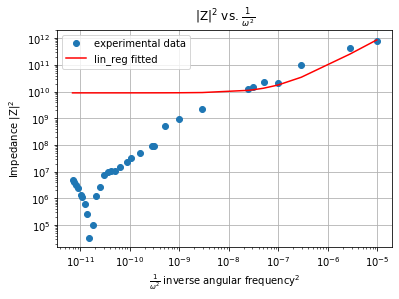

In [37]:
"""Z**2 VERSUS w**-2"""
slope, intercept, r_value, p_value, std_err = st.linregress((1/angular_frequency**2),impedance**2)
plt.plot((1/angular_frequency**2),impedance**2,'o',label='experimental data')

plt.plot((1/angular_frequency**2)*f**2,((1/angular_frequency**2)*f**2*slope+intercept),'r',label='lin_reg fitted')
plt.xlabel('$\\frac{1}{\\omega^2}$ inverse angular frequency$^2$')
plt.ylabel('Impedance |Z|$^2$')
plt.title('|Z|$^2$ vs. $\\frac{1}{\\omega^2}$')
plt.loglog()
plt.grid()
plt.legend()

p_value

#### Here's the best fit!
This plot of the impedance squared verus the inverse angular frequency squared has the best linear fit.
$$|Z|^2 \alpha \frac{1}{\omega^2}$$